In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/users/pc/Bcode/AI_academy/Data_analysis/src/boston.csv')

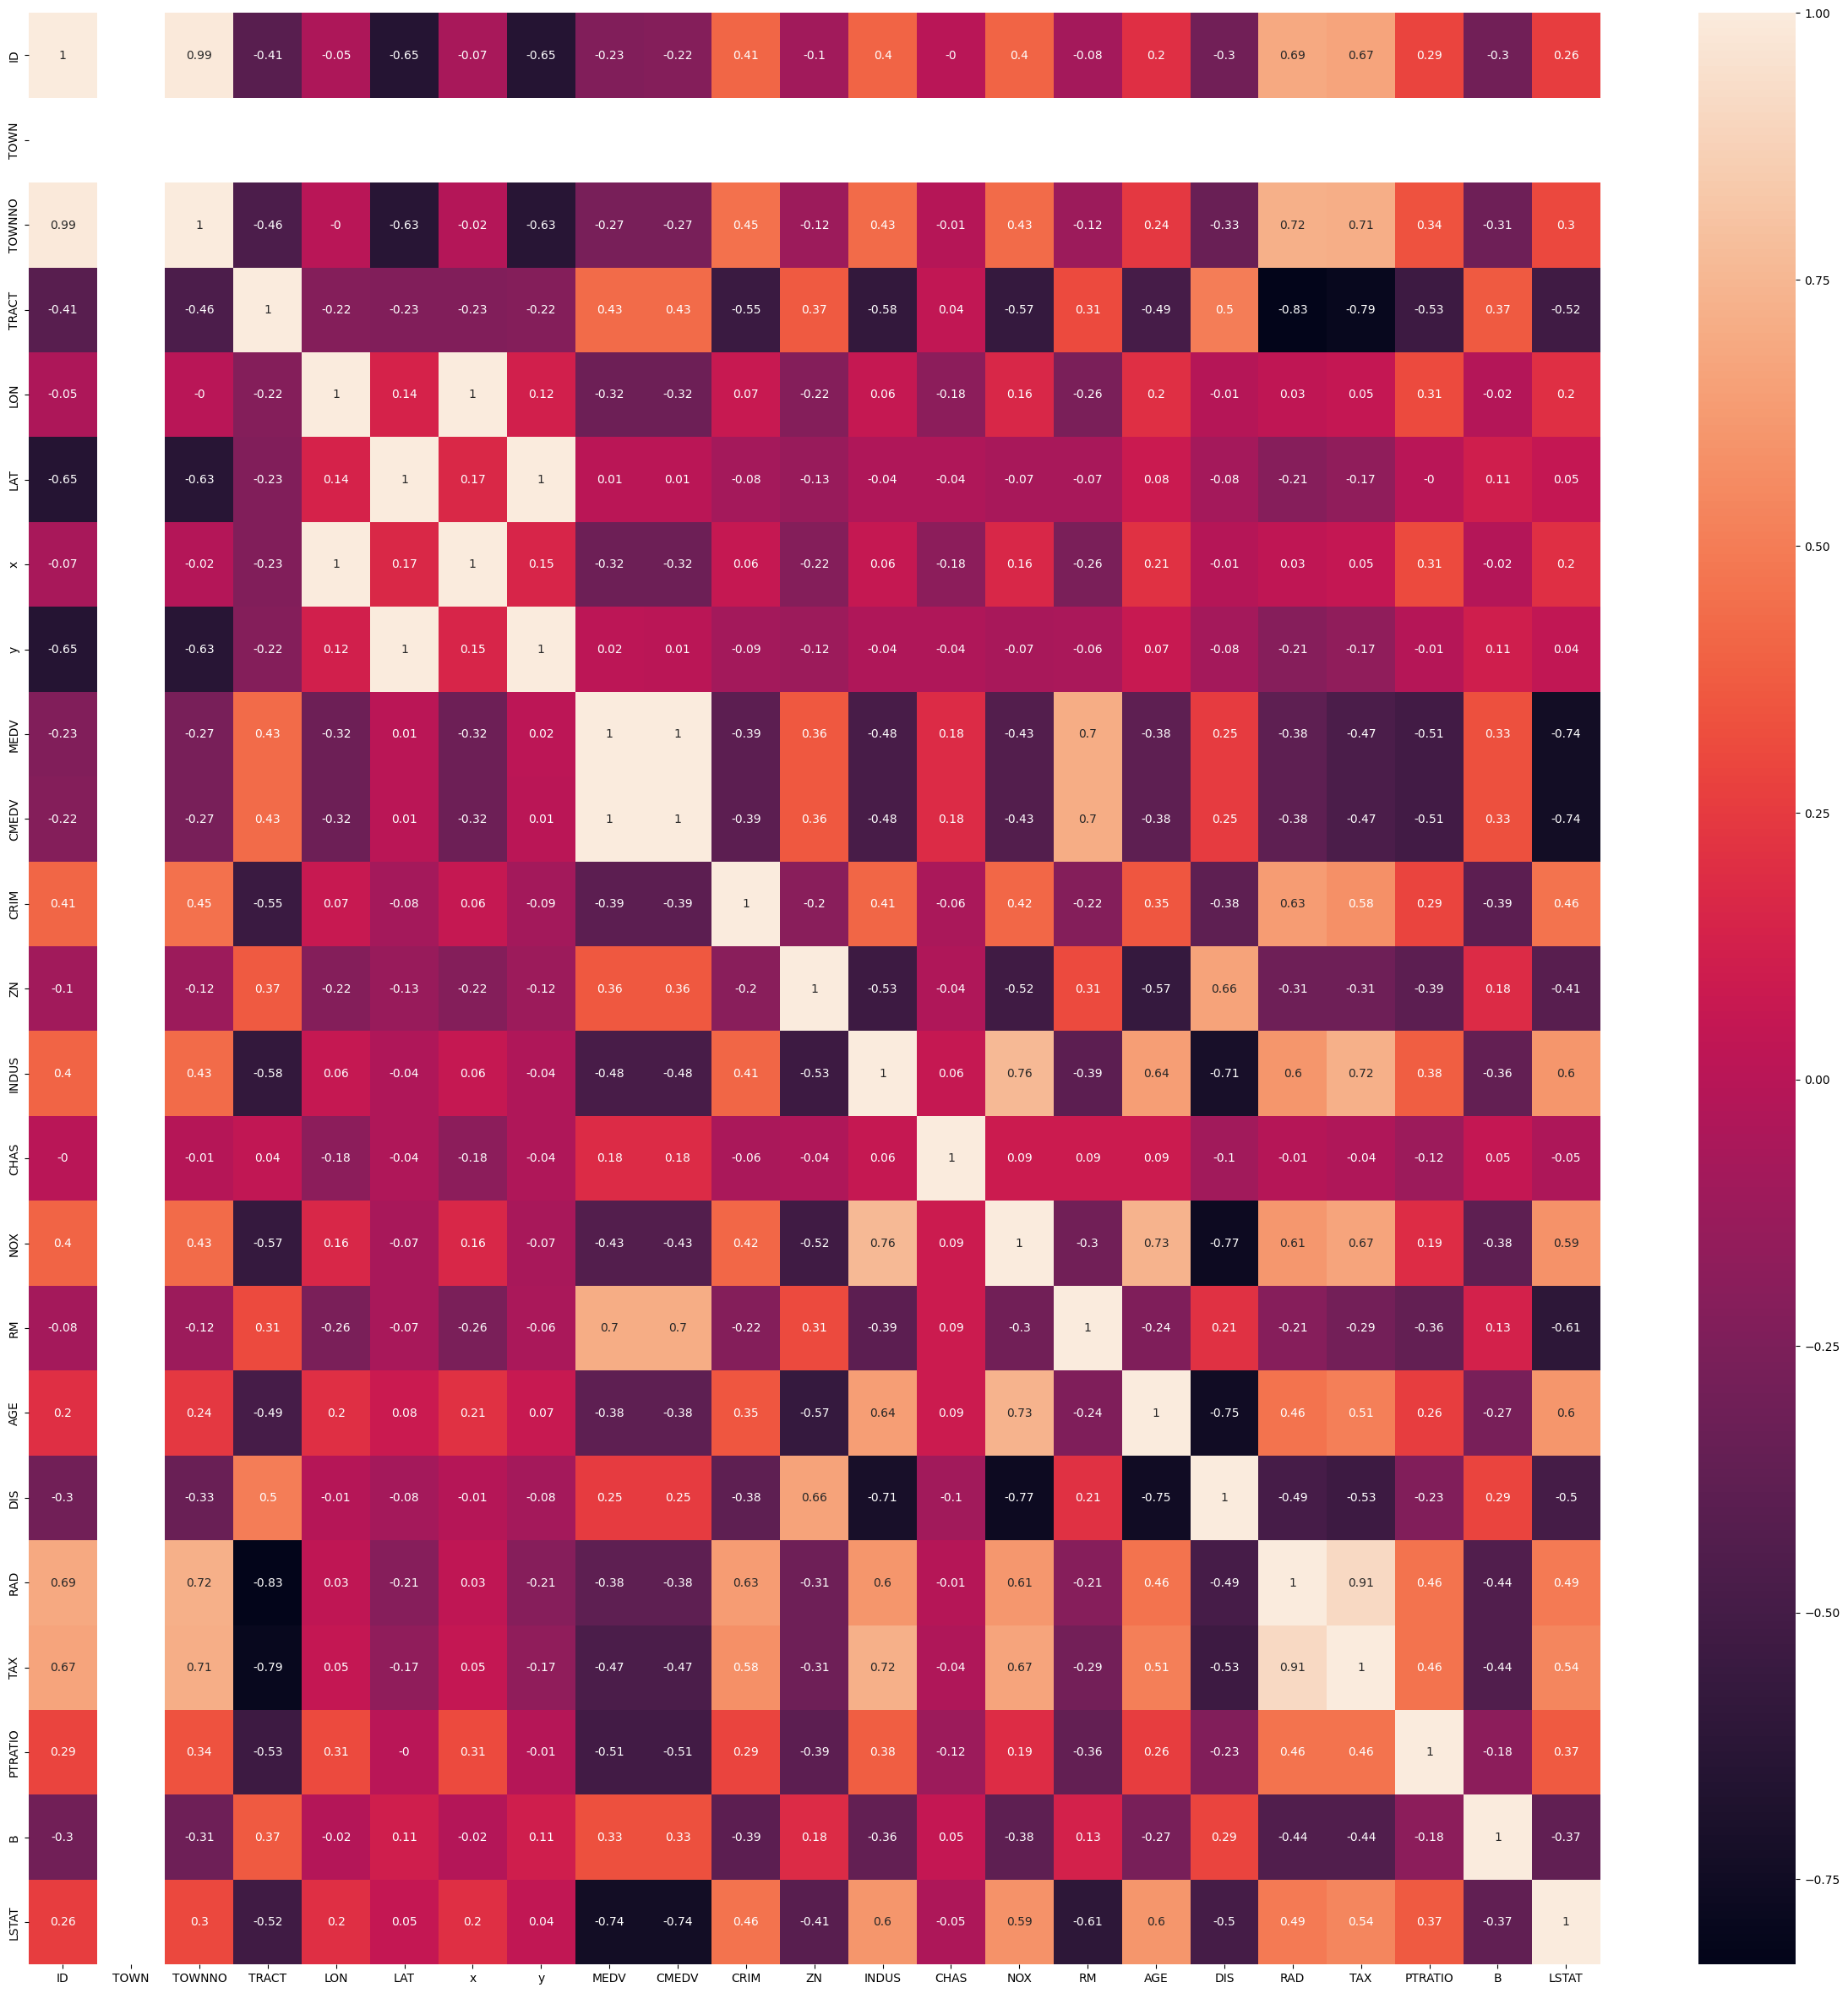

In [4]:
plt.figure(figsize=(30,30))
corr = df.corr().round(2)
sns.heatmap(corr, annot=True)
plt.show()


In [5]:
X = df[['LSTAT', 'RM']]
y = df['MEDV']

In [6]:
%matplotlib inline # qt5

UsageError: unrecognized arguments: # qt5


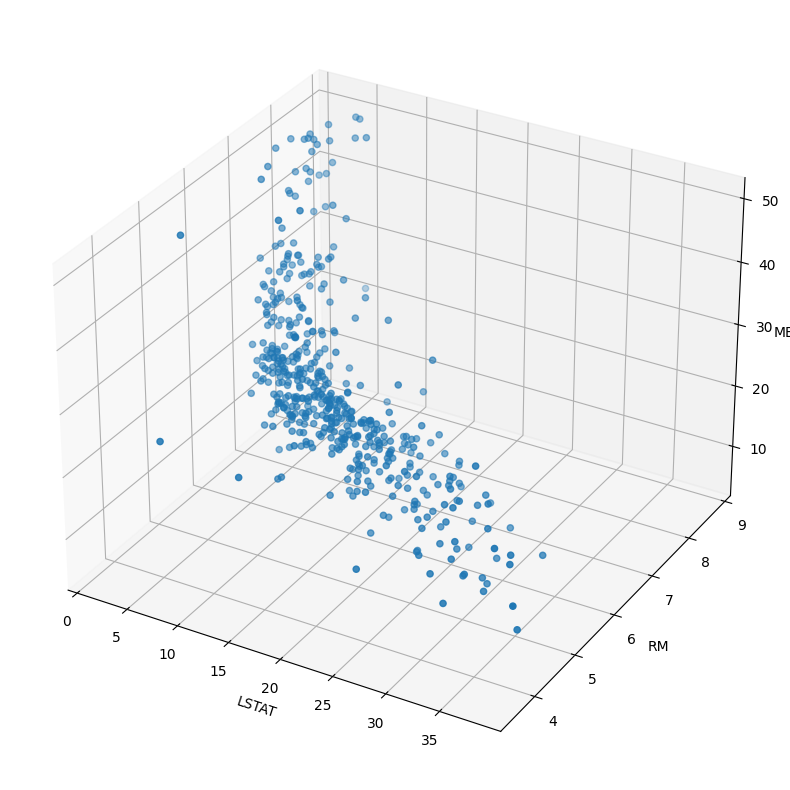

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['LSTAT'], X['RM'], y)
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pf = PolynomialFeatures(degree=2) # 2차원이면 표현 가능할 듯
X_pf = pf.fit_transform(X)
lr = LinearRegression()
lr.fit(X_pf, y)

LinearRegression()

In [9]:
xx = np.arange(0, 40, 1)
yy = np.arange(0, 10, 1)
xx, yy = np.meshgrid(xx,yy)

xxyy = np.concatenate([xx.reshape(-1,1), yy.reshape(-1,1)], axis=1)
zz = lr.predict(pf.transform(xxyy))

c:\Users\PC\Bcode\myvenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [10]:
np.concatenate([xx.reshape(-1,1), yy.reshape(-1,1)], axis=1)

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 5,  0],
       [ 6,  0],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [12,  0],
       [13,  0],
       [14,  0],
       [15,  0],
       [16,  0],
       [17,  0],
       [18,  0],
       [19,  0],
       [20,  0],
       [21,  0],
       [22,  0],
       [23,  0],
       [24,  0],
       [25,  0],
       [26,  0],
       [27,  0],
       [28,  0],
       [29,  0],
       [30,  0],
       [31,  0],
       [32,  0],
       [33,  0],
       [34,  0],
       [35,  0],
       [36,  0],
       [37,  0],
       [38,  0],
       [39,  0],
       [ 0,  1],
       [ 1,  1],
       [ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  1],
       [ 6,  1],
       [ 7,  1],
       [ 8,  1],
       [ 9,  1],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1

In [11]:
zz.reshape(xx.shape)

array([[61.00809098, 61.38825657, 61.78669388, 62.20340293, 62.63838371,
        63.09163623, 63.56316047, 64.05295645, 64.56102417, 65.08736362,
        65.6319748 , 66.19485771, 66.77601236, 67.37543874, 67.99313685,
        68.6291067 , 69.28334828, 69.95586159, 70.64664663, 71.35570341,
        72.08303192, 72.82863217, 73.59250415, 74.37464786, 75.1750633 ,
        75.99375048, 76.83070939, 77.68594004, 78.55944241, 79.45121652,
        80.36126237, 81.28957994, 82.23616925, 83.2010303 , 84.18416307,
        85.18556758, 86.20524383, 87.2431918 , 88.29941151, 89.37390295],
       [47.37594932, 47.52490862, 47.69213965, 47.87764242, 48.08141692,
        48.30346315, 48.54378112, 48.80237082, 49.07923225, 49.37436542,
        49.68777032, 50.01944695, 50.36939531, 50.73761541, 51.12410724,
        51.52887081, 51.95190611, 52.39321314, 52.8527919 , 53.3306424 ,
        53.82676463, 54.34115859, 54.87382429, 55.42476172, 55.99397088,
        56.58145178, 57.18720441, 57.81122877, 58.

In [12]:
np.concatenate([xx, yy], axis=1).shape

(10, 80)

In [16]:
%matplotlib inline

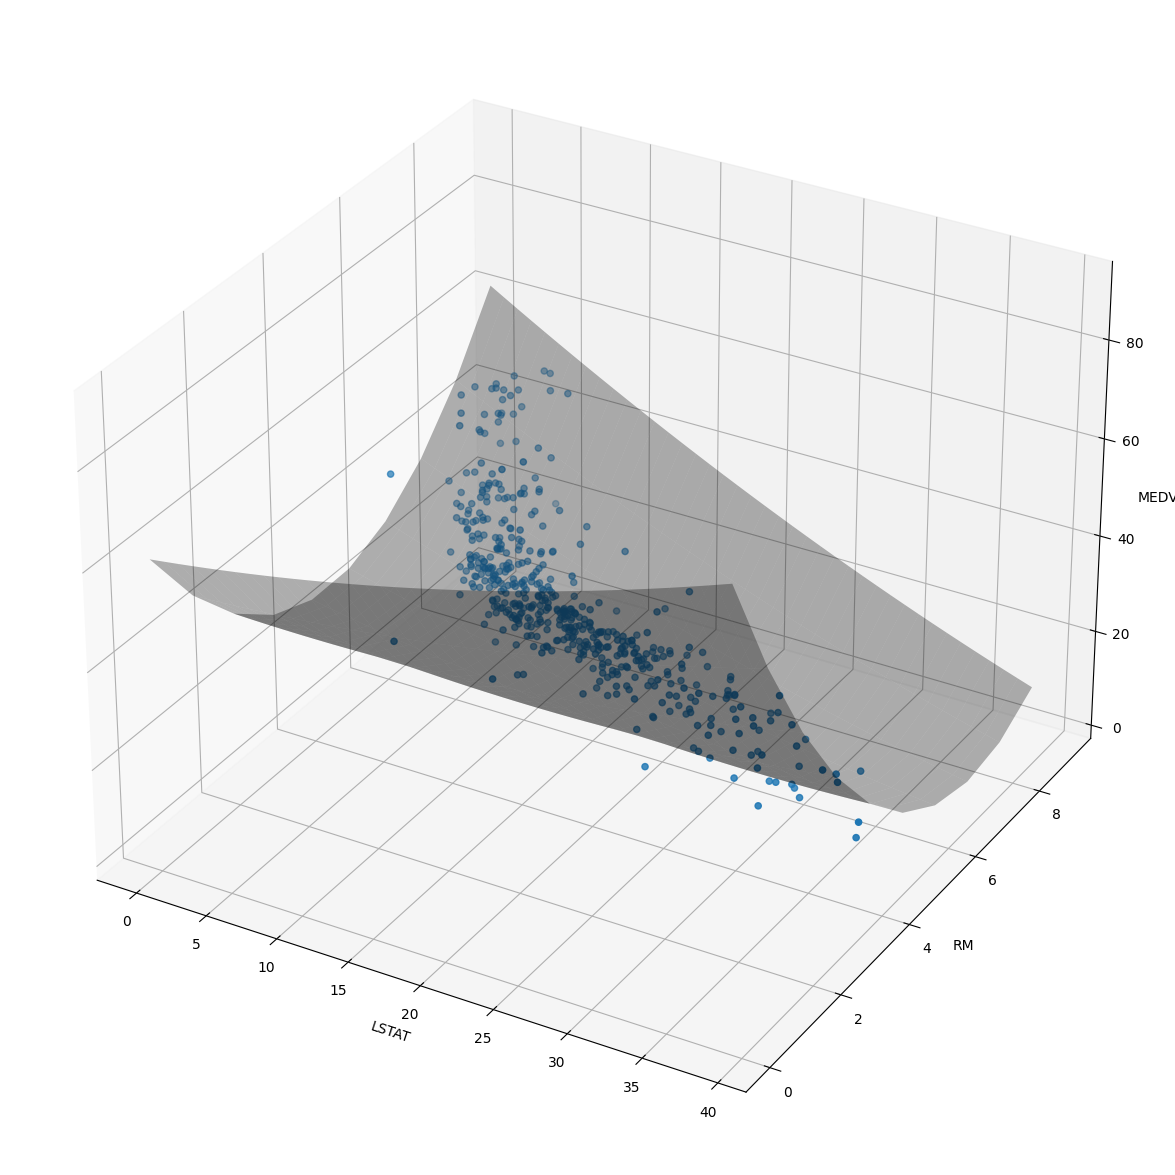

In [18]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['LSTAT'], X['RM'], y)

ax.plot_surface(xx, yy, zz.reshape(xx.shape), rstride=1, cstride=1, color='None', alpha=0.3)

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')
plt.show()

# 스케일링

In [27]:
X*1000

,LSTAT,RM
0,4980.0,6575.0
1,9140.0,6421.0
2,4030.0,7185.0
3,2940.0,6998.0
4,5330.0,7147.0
...,...,...
501,9670.0,6593.0
502,9080.0,6120.0
503,5640.0,6976.0
504,6480.0,6794.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

pf = PolynomialFeatures(degree=2) # 2차원이면 표현 가능할 듯
X_pf = pf.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_pf, y_train)

p_test = lr.predict(pf.transform(X_test))
print('basic',mean_squared_error(y_test, p_test))


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
pf = PolynomialFeatures(degree=2) # 2차원이면 표현 가능할 듯
X_pf = pf.fit_transform(X_train_sc)
lr = LinearRegression()
lr.fit(X_pf, y_train)

X_test_sc = scaler.transform(X_test)
p_test = lr.predict(pf.transform(X_test_sc))
print("표준화", mean_squared_error(y_test, p_test))


scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
pf = PolynomialFeatures(degree=2) # 2차원이면 표현 가능할 듯
X_pf = pf.fit_transform(X_train_sc)
lr = LinearRegression()
lr.fit(X_pf, y_train)

X_test_sc = scaler.transform(X_test)
p_test = lr.predict(pf.transform(X_test_sc))
print("정규화", mean_squared_error(y_test, p_test))


basic 23.805568624080923
표준화 23.805568624080955
정규화 23.80556862408095


In [38]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
wine.columns = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash'  ,'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [41]:
X = wine.iloc[:, 1:]
y = wine.iloc[:, 0]

# 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

#l1은 라소 l2는 릿지, C는 규제 강도. 숫자가 클수록 규제가 약해짐(0.001, 0.001, 0.01, 0.1, 1, 10, 100)
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=1, random_state=0, penalty='l1') 
lr.fit(X_train_sc, y_train)
lr.score(X_test_sc, y_test) # accurancy

1.0

In [43]:
lr.coef_ # 각 가중치를 보는 것

array([[ 1.24572998,  0.18063968,  0.74370406, -1.16146556,  0.        ,
         0.        ,  1.16997213,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54750453,  2.51033461],
       [-1.53722377, -0.38703221, -0.99513708,  0.36493139, -0.05955851,
         0.        ,  0.66795612,  0.        ,  0.        , -1.93393651,
         1.23386892,  0.        , -2.23181947],
       [ 0.13516421,  0.16971314,  0.35775331,  0.        ,  0.        ,
         0.        , -2.43352601,  0.        ,  0.        ,  1.56184137,
        -0.81858551, -0.49633263,  0.        ]])

# 라소

In [68]:
weights = []
params = []
score = []
for c in range(-4, 6):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10**c, random_state=0, penalty='l1') 
    lr.fit(X_train_sc, y_train)
    weights.append(lr.coef_[1]) # class 2번만 보려고 인덱스번호 1번
    params.append(10**c)
    score.append(lr.score(X_test_sc, y_test))

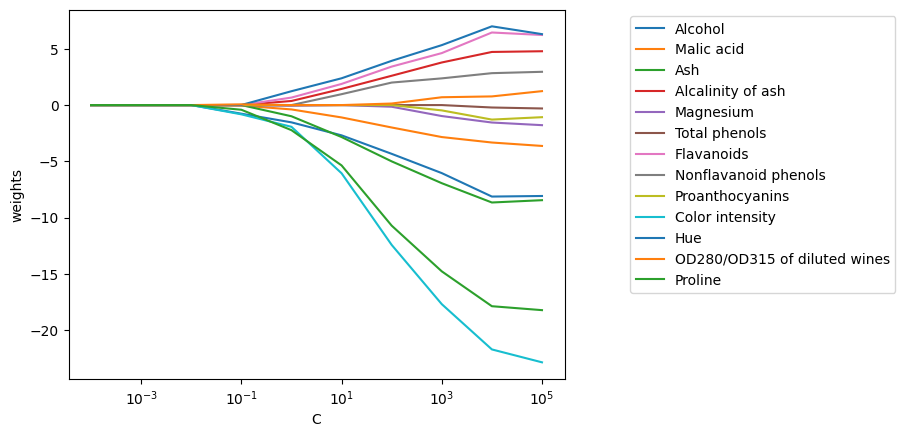

In [69]:
weights = np.array(weights)

fit = plt.figure()
ax = plt.subplot(111) # fig.add_subplot(111) 동일함
for column in range(len(wine.columns[1:])):
    plt.plot(params, weights[:, column], label=wine.columns[column+1])

plt.xlabel('C')
plt.ylabel('weights')
plt.xscale('log')
# plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 1.0), ncol=1, fancybox=True)
plt.show()

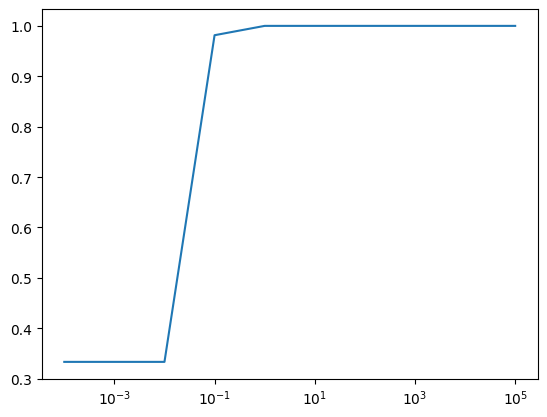

In [72]:
plt.figure()
plt.plot(params, score)
plt.xscale('log')
plt.show()

# 릿지

In [73]:
weights = []
params = []
score = []
for c in range(-4, 6):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10**c, random_state=0, penalty='l2') 
    lr.fit(X_train_sc, y_train)
    weights.append(lr.coef_[1]) # class 2번만 보려고 인덱스번호 1번
    params.append(10**c)
    score.append(lr.score(X_test_sc, y_test))

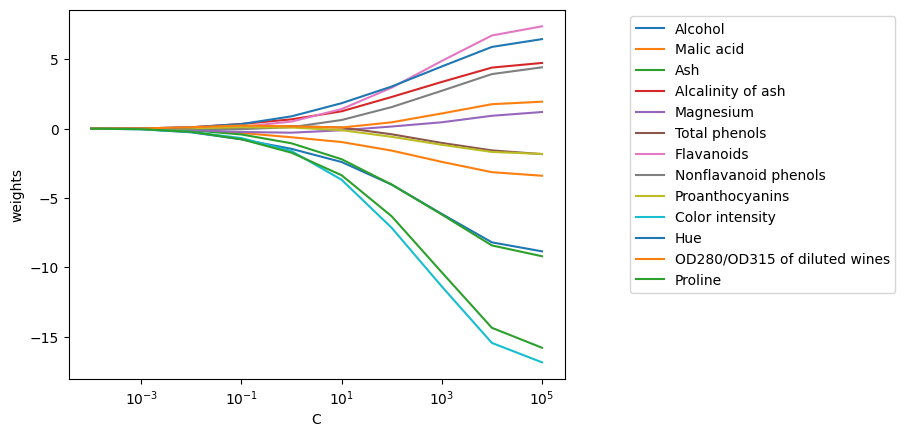

In [74]:
weights = np.array(weights)

fit = plt.figure()
ax = plt.subplot(111) # fig.add_subplot(111) 동일함
for column in range(len(wine.columns[1:])):
    plt.plot(params, weights[:, column], label=wine.columns[column+1])

plt.xlabel('C')
plt.ylabel('weights')
plt.xscale('log')
# plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 1.0), ncol=1, fancybox=True)
plt.show()

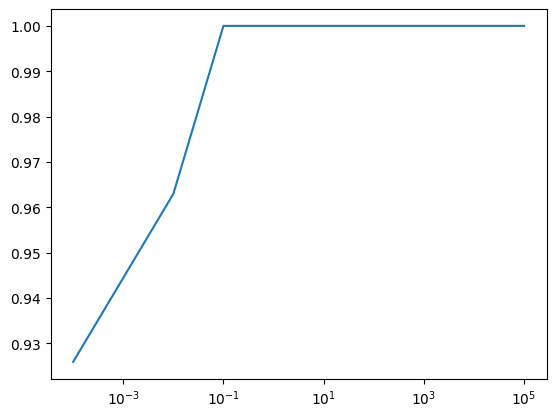

In [75]:
plt.figure()
plt.plot(params, score)
plt.xscale('log')
plt.show()